# Group 2 Final Project Technical Notebook

Name(s): Dominic Fanucchi, Carlo Sanchez, Hani Jandali    
Date:    November 5, 2023

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


# Style sheet to use with Matplotlib and Seaborn plots
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [41]:
import os
import keras
from keras.preprocessing.image import load_img

dir_ = r'../aai-501_group2/notMNIST_small'
# small_dataset = 'notMNIST_small'
# large_dataset = 'notMNIST_large'

dirs = os.listdir(dir_)

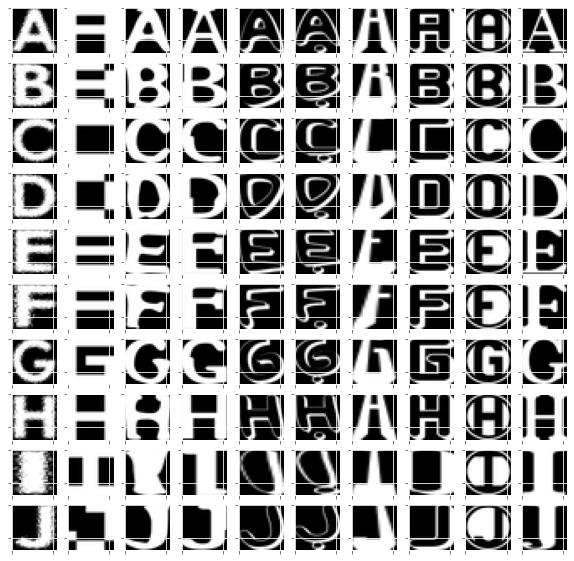

In [42]:
max_images = 100
grid_width = 10
grid_height = int(max_images/grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))

for j, cls in enumerate(dirs):
    figs = os.listdir(dir_ + '/' + cls)
    for i, fig in enumerate(figs[:grid_width]):
        ax = axs[j,i]
        ax.imshow(np.array(load_img(dir_ + '/' + cls + '/' + fig)))
        ax.set_yticklabels([])
        ax.set_xticklabels([])